## <center>INTRO TO PANDAS</center>

 ![alt text](datasets/panda.png "Logo Title Text 1")

# Packages and Dependencies 

In [1]:
#!pip3 install seaborn

In [2]:
import pandas as pd
import numpy as np

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
%matplotlib inline

% are placed behind line or cell magics (directives to the kernel interpreter)

- This particular one sets the backend of matplotlib to the 'inline' backend:
    
- With this backend, the output of plotting commands is displayed inline within 
frontends like this Jupyter notebook, directly below the code cell that produced it. 

- The resulting plots will then also be stored in the notebook document.


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling

In [5]:
pd.set_option('display.max_rows', 500)

pd.set_option('display.max_columns', 500)


## <span style="color:blue">Pandas stands for “Python Data Analysis Library”.</span>

- <font size="4">The name is derived from the term “panel data”, an econometrics term 
    for multidimensional structured data sets.</font>

## <span style="color:blue">It is a popular Python package for data science, and with good reason:</span>

-<font size="4"> It offers powerful, expressive and flexible data structures that make
    data manipulation and analysis easy, among many other things. 
    
    
- The *DataFrame* is one of these structures.


- It is one of the most preferred and widely used tools in data munging/wrangling
  if not THE most used one. 

    
- Pandas is an open source, free to use (under a BSD license) 


- Originally written by Wes McKinney.</font>


![Book](datasets/pandas_book.jpg)



#Sources


## <span style="color:blue">What Are Pandas Data Frames?.</span>


-<font size="4"> A data frame as a way to store data in rectangular grids that can easily be overviewed.


- Two-dimensional labeled data structures with columns of potentially different types.


- Each row of these grids corresponds to measurements or values of an instance 


- Each column is a vector containing data for a specific variable. 


- This means that a data frame’s rows may contain the same or different
  types of values:  numeric, character, logical, etc.
        
        
- In general, you could say that the Pandas DataFrame consists of 
  three main components: *the data*, *the index*, and *the column (names)*.

        
- A DataFrame can contain data that is:

    
- a Pandas Series: a one-dimensional labeled array capable of holding any data type with axis labels or index. 

    
- An example of a Series object is one column from a DataFrame.
    
    
- a Pandas DataFrame  (several series merged)


![Book](datasets/df.png)
    

    
    
- a NumPy ndarray, which can be a record or structured a two-dimensional ndarray, 

  dictionaries of one-dimensional ndarray’s, lists, dictionaries or Series.</font>


-<font size="4">Besides data, you can also specify the index and column names for your DataFrame. 


- The *index*, on the one hand, indicates the difference in rows, 


- while the *column name* indicate the difference in columns.</font>

## Today we want to review how to manipulate dataframes and some of their operations

# Create a Dataframe

- From scratch
- Convert other data structures, such as lists or NumPy arrays, to Pandas DataFrames
- Read from a source e.g. a file (CSV, Excel, etc), a SQL query...etc.

For example, from three lists: from parts of the numpy array of lists

In [6]:
data = np.array([['','Col1','Col2'],
                ['Row1',1,2],
                ['Row2',3,4]])
                
dfnew = pd.DataFrame(data=data[1:,1:],
                  index=data[1:,0],
                  columns=data[0,1:])

In [7]:
dfnew

,Col1,Col2
Row1,1,2
Row2,3,4


In [8]:
# First tells which list we refer to, second how many members from the list: (numpy indexing)
data[1,1:]


array(['1', '2'], dtype='<U4')

Dont forget indexing starts at 0!

In [9]:
# Take a 2D array as input to your DataFrame 
my_2darray = np.array([[1, 2, 3], [4, 5, 6]])
print(pd.DataFrame(my_2darray))
my_2darray

   0  1  2
0  1  2  3
1  4  5  6


array([[1, 2, 3],
       [4, 5, 6]])

In [10]:
# Take a dictionary as input to your DataFrame 
my_dict = {1: ['1', '3'], 2: ['1', '2'], 3: ['2', '4']}
print(pd.DataFrame(my_dict))


   1  2  3
0  1  1  2
1  3  2  4


In [11]:
# Take a series or a DataFrame as input to your DataFrame 
my_df = pd.DataFrame(data=[4,5,6,7], index=range(0,4), columns=['A'])
print(pd.DataFrame(my_df))

   A
0  4
1  5
2  6
3  7


In [12]:
# Take a Series as input to your DataFrame
my_series = pd.Series({"United Kingdom":"Ale", "Canada":"Salmon",  "Mexico":"Sope",  "India":"Curry", "United States":"JunkFood", "Belgium":"Stella"})
print(pd.DataFrame(my_series))

                       0
Belgium           Stella
Canada            Salmon
India              Curry
Mexico              Sope
United Kingdom       Ale
United States   JunkFood


Note that the index of your Series (and DataFrame) contains the *keys of the original dictionary*, 
but that they are sorted: Belgium will be the index at 0, while India will be the index at 2.

# Data Ingestion: 

## Dataframe from a CSV file 

In [51]:
df_from_csv = pd.read_csv('datasets/sales.csv', index_col='Month') 

In [7]:
df_from_csv

,hello,yes,no,hei
Month,,,,
Jan,47,12.0,17,NaN
Feb,110,50.0,31,NaN
Mar,221,89.0,72,NaN
Apr,77,87.0,20,NaN
May,132,NaN,52,NaN
Jun,205,60.0,55,NaN


## Dataframe from a SQL query to a Database

In [8]:
import  sqlite3
# Creates or opens a file called database.db with a SQLite3 DB
db = sqlite3.connect('database.db')

In [9]:
query = '''select * from wines  '''

In [10]:
df_from_sql=pd.read_sql(query,db)

In [11]:
df_from_sql

,id,producer,kind,country
0,1,Rooiberg,Pinotage,South Africa
1,2,KWV,Shiraz,South Africa
2,3,Marks & Spencer,Pinot Noir,France


## Empty Dataframe

In [19]:
I_am_empty = pd.DataFrame()
I_am_empty

""


# Viewing and Inspecting Data

In [20]:
df_from_csv.shape

(6, 4)

In [21]:
len(df_from_csv)

6

In [22]:
df_from_csv.count()

hello    6
yes      5
no       6
hei      0
dtype: int64

In [23]:
df_from_csv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, Jan to Jun
Data columns (total 4 columns):
hello    6 non-null int64
yes      5 non-null float64
no       6 non-null int64
hei      0 non-null float64
dtypes: float64(2), int64(2)
memory usage: 240.0+ bytes


In [24]:
# Unique values and their  counts
df_from_csv.hello.value_counts()

47     1
110    1
221    1
132    1
205    1
77     1
Name: hello, dtype: int64

# Data indigestion 

In [12]:
score = pd.read_csv('datasets/Most-Recent-Cohorts-Scorecard-Elements.csv')

In [13]:
score.shape

(7175, 123)

In [14]:
score.head()

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,INSTURL,NPCURL,HCM2,PREDDEG,HIGHDEG,CONTROL,LOCALE,HBCU,PBI,ANNHI,TRIBAL,AANAPII,HSI,NANTI,MENONLY,WOMENONLY,RELAFFIL,SATVR25,SATVR75,SATMT25,SATMT75,SATWR25,SATWR75,SATVRMID,SATMTMID,SATWRMID,ACTCM25,ACTCM75,ACTEN25,ACTEN75,ACTMT25,ACTMT75,ACTWR25,ACTWR75,ACTCMMID,ACTENMID,ACTMTMID,ACTWRMID,SAT_AVG,SAT_AVG_ALL,PCIP01,PCIP03,PCIP04,PCIP05,PCIP09,PCIP10,PCIP11,PCIP12,PCIP13,PCIP14,PCIP15,PCIP16,PCIP19,PCIP22,PCIP23,PCIP24,PCIP25,PCIP26,PCIP27,PCIP29,PCIP30,PCIP31,PCIP38,PCIP39,PCIP40,PCIP41,PCIP42,PCIP43,PCIP44,PCIP45,PCIP46,PCIP47,PCIP48,PCIP49,PCIP50,PCIP51,PCIP52,PCIP54,DISTANCEONLY,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,NPT4_PUB,NPT4_PRIV,NPT41_PUB,NPT42_PUB,NPT43_PUB,NPT44_PUB,NPT45_PUB,NPT41_PRIV,NPT42_PRIV,NPT43_PRIV,NPT44_PRIV,NPT45_PRIV,PCTPELL,RET_FT4_POOLED_SUPP,RET_FTL4_POOLED_SUPP,RET_PT4_POOLED_SUPP,RET_PTL4_POOLED_SUPP,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GT_25K_P6,GRAD_DEBT_MDN_SUPP,GRAD_DEBT_MDN10YR_SUPP,RPY_3YR_RT_SUPP,C150_L4_POOLED_SUPP,C150_4_POOLED_SUPP
0,100654,100200,1002,Alabama A & M University,Normal,AL,www.aamu.edu/,www2.aamu.edu/scripts/netpricecalc/npcalc.htm,0,3,4,1,12.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,380.0,470.0,370.0,470.0,370.0,457.0,425.0,420.0,414.0,16.0,19.0,14.0,20.0,15.0,18.0,NaN,NaN,18.0,17.0,17.0,NaN,849.0,849.0,0.0448,0.0142,0.0071,0.0000,0.0000,0.0354,0.0401,0.0,0.1132,0.0896,0.0472,0.0000,0.0330,0.0,0.0094,0.0660,0.0,0.0708,0.0024,0.0,0.0,0.0000,0.0000,0.0,0.0307,0.0,0.0472,0.0519,0.0377,0.0448,0.0,0.0,0.0,0.0,0.0283,0.0000,0.1863,0.0000,0.0,4616.0,0.0256,0.9129,0.0076,0.0019,0.0024,0.0017,0.0401,0.0065,0.0013,0.0877,1,15567.0,NaN,15043.0,15491.0,17335.0,19562.0,18865.0,NaN,NaN,NaN,NaN,NaN,0.7039,0.6154,NaN,0.3111,NaN,0.7667,0.0859,29900,0.453,35000,361.891446885773,0.2458495231,NaN,0.2913
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,www.uab.edu,uab.studentaidcalculator.com/survey.aspx,0,3,4,1,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,480.0,640.0,490.0,660.0,NaN,NaN,560.0,575.0,NaN,21.0,28.0,22.0,30.0,19.0,26.0,NaN,NaN,25.0,26.0,23.0,NaN,1125.0,1125.0,0.0000,0.0000,0.0000,0.0005,0.0360,0.0000,0.0131,0.0,0.0748,0.0599,0.0000,0.0059,0.0000,0.0,0.0158,0.0135,0.0,0.0734,0.0090,0.0,0.0,0.0000,0.0050,0.0,0.0212,0.0,0.0766,0.0243,0.0221,0.0365,0.0,0.0,0.0,0.0,0.0392,0.2500,0.2072,0.0162,0.0,12047.0,0.5786,0.2626,0.0309,0.0598,0.0028,0.0004,0.0387,0.0179,0.0083,0.2578,1,16475.0,NaN,13849.0,15385.0,18022.0,18705.0,19319.0,NaN,NaN,NaN,NaN,NaN,0.3525,0.8227,NaN,0.5147,NaN,0.5179,0.2363,40200,0.669,21500,222.304745944118,0.5199110572,NaN,0.5384
2,100690,2503400,25034,Amridge University,Montgomery,AL,www.amridgeuniversity.edu,www2.amridgeuniversity.edu:9091/,0,3,4,2,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0889,0.0,0.0000,0.0889,0.0,0.0000,0.0000,0.0,0.0,0.0000,0.0000,0.4,0.0000,0.0,0.0000,0.0667,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0000,0.3556,0.0000,1.0,293.0,0.1570,0.2355,0.0068,0.0000,0.0000,0.0034,0.0000,0.0000,0.5973,0.5392,1,NaN,10155.0,NaN,NaN,NaN,NaN,NaN,10155.0,NaN,NaN,NaN,NaN,0.6971,0.3333,NaN,PrivacySuppressed,NaN,0.8436,0.8571,40100,0.658,23000,237.814379382079,0.2331002331,NaN,PrivacySuppressed
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,www.uah.edu,finaid.uah.edu/,0,3,4,1,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,520.0,660.0,540.0,680.0,NaN,NaN,590.0,610.0,NaN,25.0,31.0,24.0,33.0,23.0,29.0,NaN,NaN,28.0,29.0,26.0,NaN,1257.0,1257.0,0.0000,0.0000,0.0000,0.0000,0.0301,0.0000,0.0499,0.0,0.0282,0.2702,0.0000,0.0151,0.0000,0.0,0.0122,0.0000,0.0,0.0603,0.0132,0.0,0.0,0.0000,0.0113,0.0,0.0226,0.0,0.0160,0.0000,0.0000,0.0188,0.0,0.0,0.0,0.0,0.0264,0.1911,0.2250,0.0094,0.0,6346.0,0.7148,0.1131,0.0411,0.0414,0.0120,0.0000,0.0181,0.0303,0.0

In [28]:
score.head(1)

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,INSTURL,NPCURL,HCM2,PREDDEG,HIGHDEG,CONTROL,LOCALE,HBCU,PBI,ANNHI,TRIBAL,AANAPII,HSI,NANTI,MENONLY,WOMENONLY,RELAFFIL,SATVR25,SATVR75,SATMT25,SATMT75,SATWR25,SATWR75,SATVRMID,SATMTMID,SATWRMID,ACTCM25,ACTCM75,ACTEN25,ACTEN75,ACTMT25,ACTMT75,ACTWR25,ACTWR75,ACTCMMID,ACTENMID,ACTMTMID,ACTWRMID,SAT_AVG,SAT_AVG_ALL,PCIP01,PCIP03,PCIP04,PCIP05,PCIP09,PCIP10,PCIP11,PCIP12,PCIP13,PCIP14,PCIP15,PCIP16,PCIP19,PCIP22,PCIP23,PCIP24,PCIP25,PCIP26,PCIP27,PCIP29,PCIP30,PCIP31,PCIP38,PCIP39,PCIP40,PCIP41,PCIP42,PCIP43,PCIP44,PCIP45,PCIP46,PCIP47,PCIP48,PCIP49,PCIP50,PCIP51,PCIP52,PCIP54,DISTANCEONLY,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,NPT4_PUB,NPT4_PRIV,NPT41_PUB,NPT42_PUB,NPT43_PUB,NPT44_PUB,NPT45_PUB,NPT41_PRIV,NPT42_PRIV,NPT43_PRIV,NPT44_PRIV,NPT45_PRIV,PCTPELL,RET_FT4_POOLED_SUPP,RET_FTL4_POOLED_SUPP,RET_PT4_POOLED_SUPP,RET_PTL4_POOLED_SUPP,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GT_25K_P6,GRAD_DEBT_MDN_SUPP,GRAD_DEBT_MDN10YR_SUPP,RPY_3YR_RT_SUPP,C150_L4_POOLED_SUPP,C150_4_POOLED_SUPP
0,100654,100200,1002,Alabama A & M University,Normal,AL,www.aamu.edu/,www2.aamu.edu/scripts/netpricecalc/npcalc.htm,0,3,4,1,12.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,380.0,470.0,370.0,470.0,370.0,457.0,425.0,420.0,414.0,16.0,19.0,14.0,20.0,15.0,18.0,NaN,NaN,18.0,17.0,17.0,NaN,849.0,849.0,0.0448,0.0142,0.0071,0.0,0.0,0.0354,0.0401,0.0,0.1132,0.0896,0.0472,0.0,0.033,0.0,0.0094,0.066,0.0,0.0708,0.0024,0.0,0.0,0.0,0.0,0.0,0.0307,0.0,0.0472,0.0519,0.0377,0.0448,0.0,0.0,0.0,0.0,0.0283,0.0,0.1863,0.0,0.0,4616.0,0.0256,0.9129,0.0076,0.0019,0.0024,0.0017,0.0401,0.0065,0.0013,0.0877,1,15567.0,NaN,15043.0,15491.0,17335.0,19562.0,18865.0,NaN,NaN,NaN,NaN,NaN,0.7039,0.6154,NaN,0.3111,NaN,0.7667,0.0859,29900,0.453,35000,361.891446885773,0.2458495231,NaN,0.2913


In [29]:
# score.tail()

In [52]:
score.CITY.value_counts()

New York                   87
Chicago                    76
Houston                    68
Los Angeles                55
Miami                      49
Brooklyn                   48
San Antonio                47
Philadelphia               44
Dallas                     40
Atlanta                    39
Jacksonville               37
Columbus                   36
Phoenix                    35
Portland                   35
Indianapolis               35
Springfield                35
Boston                     33
San Diego                  33
Austin                     32
Pittsburgh                 31
Nashville                  30
Memphis                    30
Washington                 30
Columbia                   30
Tampa                      28
Cincinnati                 28
Kansas City                27
Rochester                  27
Las Vegas                  26
Baton Rouge                25
Denver                     25
Saint Louis                25
Baltimore                  24
Louisville

In [31]:
# Put all comuns on a list, for example
#list(score.columns.values)

## Data  Cleaning: Nulls

In [32]:
#Easier with a smaller df
df_from_csv.head()

,hello,yes,no,hei
Month,,,,
Jan,47,12.0,17,NaN
Feb,110,50.0,31,NaN
Mar,221,89.0,72,NaN
Apr,77,87.0,20,NaN
May,132,NaN,52,NaN


In [16]:
df_from_csv.yes.value_counts(dropna=False)

 60.0    1
NaN      1
 87.0    1
 89.0    1
 50.0    1
 12.0    1
Name: yes, dtype: int64

In [34]:
df_from_csv.yes.value_counts()

60.0    1
87.0    1
89.0    1
50.0    1
12.0    1
Name: yes, dtype: int64

In [35]:
df_from_csv.isnull()

,hello,yes,no,hei
Month,,,,
Jan,False,False,False,True
Feb,False,False,False,True
Mar,False,False,False,True
Apr,False,False,False,True
May,False,True,False,True
Jun,False,False,False,True


In [36]:
#The opposite or the complement 
df_from_csv.notnull() 

,hello,yes,no,hei
Month,,,,
Jan,True,True,True,False
Feb,True,True,True,False
Mar,True,True,True,False
Apr,True,True,True,False
May,True,False,True,False
Jun,True,True,True,False


In [37]:
#How many nulls per column
df_from_csv.isnull().sum()

hello    0
yes      1
no       0
hei      6
dtype: int64

In [38]:
df_from_csv

,hello,yes,no,hei
Month,,,,
Jan,47,12.0,17,NaN
Feb,110,50.0,31,NaN
Mar,221,89.0,72,NaN
Apr,77,87.0,20,NaN
May,132,NaN,52,NaN
Jun,205,60.0,55,NaN


In [39]:
# Drop na's from rows
df_from_csv.dropna()

,hello,yes,no,hei
Month,,,,


In [40]:
# Drop columns with na's 

In [41]:
df_from_csv.dropna(axis=1)

,hello,no
Month,,
Jan,47,17
Feb,110,31
Mar,221,72
Apr,77,20
May,132,52
Jun,205,55


In [19]:
df_from_csv.fillna(56.5)

,hello,yes,no,hei
Month,,,,
Jan,47,12.0,17,56.5
Feb,110,50.0,31,56.5
Mar,221,89.0,72,56.5
Apr,77,87.0,20,56.5
May,132,56.5,52,56.5
Jun,205,60.0,55,56.5


In [ ]:
#df_from_csv.fillna(df_from_csv.mean()) 
#mean can be replaced with almost any function from the statistics section)
#Repalces with the column mean

## Important to keep in mind that....

In [18]:
#df_from_csv.fillna(df_from_csv.mean()) 
# will return the new dataframe, 
# so you will have to write 
# df=df.fillna(df.mean())  to actually modify it 

,hello,yes,no,hei
Month,,,,
Jan,47,12.0,17,NaN
Feb,110,50.0,31,NaN
Mar,221,89.0,72,NaN
Apr,77,87.0,20,NaN
May,132,59.6,52,NaN
Jun,205,60.0,55,NaN


- *df.describe()* which outputs summary statistics for numerical columns. 

It is also possible to get statistics on the entire data frame or a series (a column etc):

- *df.mean()* Returns the mean of all columns
- *df.corr()* Returns the correlation between columns in a data frame
- *df.count()* Returns the number of non-null values in each data frame column
- *df.max()* Returns the highest value in each column
- *df.min()* Returns the lowest value in each column
- *df.median()* Returns the median of each column
- *df.std()* Returns the standard deviation of each column

### Create a loop that assigns the mean of the row to the column "hei"

In [37]:
averages = []
for i in range(len(df_from_csv)):
    row_mean = df_from_csv.iloc[i,0:3].mean()
    averages.append(row_mean)

df_from_csv.hei = averages

df_from_csv


,hello,yes,no,hei
Month,,,,
Jan,47,12.0,17,25.333333
Feb,110,50.0,31,63.666667
Mar,221,89.0,72,127.333333
Apr,77,87.0,20,61.333333
May,132,NaN,52,92.000000
Jun,205,60.0,55,106.666667


## Memory Usage of a dataframe

In [50]:
df_from_csv.memory_usage()

Index        80
RM         3912
LSTAT      3912
PTRATIO    3912
MEDV       3912
dtype: int64

In [46]:
# remember me? im 7k plus lines!
score.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7175 entries, 0 to 7174
Columns: 123 entries, UNITID to C150_4_POOLED_SUPP
dtypes: float64(99), int64(8), object(16)
memory usage: 12.4 MB


In [47]:
# del(score)

# Some statistics on calories

In [40]:
# Different delimiter
calories = pd.read_csv('datasets/calories.csv', sep=';')

In [49]:
calories.head()

,Food,Measure,Weight (g),kCal,Fat (g),Carbo(g),Protein (g)
0,"1000 Island,Salad Drsng,Local",1 Tbsp,15.00,25,2,2,0
1,"1000 Island,Salad Drsng,Reglr",1 Tbsp,16.00,60,6,2,0
2,"40% Bran Flakes,Kellogg's",1 oz,28.35,90,1,22,4
3,"40% Bran Flakes,Post",1 oz,28.35,90,0,22,3
4,"Alfalfa Seeds,Sprouted,Raw",1 Cup,33.00,10,0,1,1


In [50]:
calories.shape

(960, 7)

In [51]:
calories.describe() 

,Weight (g),kCal,Fat (g),Carbo(g),Protein (g)
count,960.000000,960.000000,960.00000,960.000000,960.000000
mean,149.535469,270.585417,12.50625,34.025000,7.236458
std,175.957583,543.182724,33.16150,78.537767,10.127206
min,0.400000,0.000000,0.00000,0.000000,0.000000
25%,32.750000,65.000000,0.00000,3.000000,1.000000
50%,113.500000,125.000000,2.00000,14.000000,3.000000
75%,218.000000,230.000000,10.00000,31.000000,8.000000
max,1542.000000,6175.000000,328.00000,783.000000,74.000000


# Selection of Data

In [41]:
 df = pd.read_csv('datasets/spam.csv', index_col='month') 

In [42]:
df

,eggs,salt,spam
month,,,
Jan,47,12.0,17
Feb,110,50.0,31
Mar,221,89.0,72
Apr,77,87.0,20
May,132,NaN,52
Jun,205,60.0,55


In [43]:
#Indexing using square brackets
df['salt']['Jan'] 

12.0

In [55]:
#Using column a!ribute and row label
df.eggs['Mar']

221

In [56]:
#You can select a column
df['eggs']

month
Jan     47
Feb    110
Mar    221
Apr     77
May    132
Jun    205
Name: eggs, dtype: int64

In [57]:
# and return column with label col as Series or a few columns 
#and returns columns as a new DataFrame.
df2=df[['eggs', 'spam']]
df2

,eggs,spam
month,,
Jan,47,17
Feb,110,31
Mar,221,72
Apr,77,20
May,132,52
Jun,205,55


## Accesors  .loc[] and .iloc[]

In [58]:
#You can select by position (s.iloc[0]),  
df.iloc[0]

eggs    47.0
salt    12.0
spam    17.0
Name: Jan, dtype: float64

In [59]:
 df.iloc[4, 2] 

52

In [60]:
#or by index 
df.loc['May', 'spam']

52

In [61]:
#Select one column
df['eggs']

month
Jan     47
Feb    110
Mar    221
Apr     77
May    132
Jun    205
Name: eggs, dtype: int64

In [62]:
type(df['eggs'])

pandas.core.series.Series

## * .loc[] works on labels of your index. 
##   - This means that if you give in loc['May'], you look for the values of your 
##   - DataFrame that have an index labeled 'May'.

## * .iloc[] works on the positions in your index. 
##   - This means that if you give in iloc[2], 
##   - you look for the values of your DataFrame that are at index ’2`.

- These can also be used in different combinations
- so I hope it gives you an idea of the different selection and 
  indexing you can perform in Pandas.

## Basic Slicing

In [63]:
df

,eggs,salt,spam
month,,,
Jan,47,12.0,17
Feb,110,50.0,31
Mar,221,89.0,72
Apr,77,87.0,20
May,132,NaN,52
Jun,205,60.0,55


In [64]:
#First row, range:
df.iloc[0,:]

eggs    47.0
salt    12.0
spam    17.0
Name: Jan, dtype: float64

In [65]:
# Part of the eggs column 
df['eggs'][1:4] 

month
Feb    110
Mar    221
Apr     77
Name: eggs, dtype: int64

In [66]:
df['eggs'][4] 

132

In [67]:
df.loc[:, 'eggs':'salt'] # All rows, some columns 

,eggs,salt
month,,
Jan,47,12.0
Feb,110,50.0
Mar,221,89.0
Apr,77,87.0
May,132,NaN
Jun,205,60.0


In [68]:
 df.loc['Jan':'Apr',:] # Some rows, all columns 

,eggs,salt,spam
month,,,
Jan,47,12.0,17
Feb,110,50.0,31
Mar,221,89.0,72
Apr,77,87.0,20


In [69]:
df.loc['Mar':'May', 'salt':'spam'] 

,salt,spam
month,,
Mar,89.0,72
Apr,87.0,20
May,NaN,52


In [70]:
df.iloc[2:5, 1:] # A block from middle of the DataFrame

,salt,spam
month,,
Mar,89.0,72
Apr,87.0,20
May,NaN,52


In [71]:
df.loc['Jan':'May', ['eggs', 'spam']] #Using lists rather than slices

,eggs,spam
month,,
Jan,47,17
Feb,110,31
Mar,221,72
Apr,77,20
May,132,52


In [72]:
df.iloc[[0,4,5], 0:2] 

,eggs,salt
month,,
Jan,47,12.0
May,132,NaN
Jun,205,60.0


# Project 1 

Go to project_1 notebook

# SESSION 2

## Index Gymnastics

In [73]:
# In some cases, you want to make your index part of your DataFrame.
df = pd.DataFrame(data=np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]), columns=['A', 'B', 'C'])

In [74]:
# Add a column to your dataframe with the index 

In [44]:
df['D'] = df.index

In [45]:
df

,eggs,salt,spam,D
month,,,,
Jan,47,12.0,17,Jan
Feb,110,50.0,31,Feb
Mar,221,89.0,72,Mar
Apr,77,87.0,20,Apr
May,132,NaN,52,May
Jun,205,60.0,55,Jun


In [5]:
# When your index doesn’t look entirely the way you want it to, you can opt to reset it
df = pd.DataFrame([('bird',    389.0),
                    ('bird',     24.0),
                    ('mammal',   80.5),
                    ('mammal', np.nan)],
                   index=['falcon', 'parrot', 'lion', 'monkey'],
                   columns=('class', 'max_speed'))
df

,class,max_speed
falcon,bird,389.0
parrot,bird,24.0
lion,mammal,80.5
monkey,mammal,NaN


In [10]:
#When we reset the index, the old index is added as a column, and a new sequential index is used:
dfnew=df.reset_index()
dfnew

,index,class,max_speed
0,falcon,bird,389.0
1,parrot,bird,24.0
2,lion,mammal,80.5
3,monkey,mammal,NaN


In [7]:
# We can use the drop parameter to avoid the old index being added as a column:
df.reset_index(drop=True)

,class,max_speed
0,bird,389.0
1,bird,24.0
2,mammal,80.5
3,mammal,NaN


In [12]:
#SET INDEX, lets make a column the new index
dfmasnew=dfnew[['index', 'max_speed','class']].set_index('class')
dfmasnew

,index,max_speed
class,,
bird,falcon,389.0
bird,parrot,24.0
mammal,lion,80.5
mammal,monkey,NaN


In [9]:
# remember you need to output this to a df to keep the changes, or it works on a copy 
# dfnew= df.reset_index(drop=True)

## Select rows from a DataFrame based on values in a column in pandas

In [81]:
calories.head(2)

,Food,Measure,Weight (g),kCal,Fat (g),Carbo(g),Protein (g)
0,"1000 Island,Salad Drsng,Local",1 Tbsp,15.0,25,2,2,0
1,"1000 Island,Salad Drsng,Reglr",1 Tbsp,16.0,60,6,2,0


To select rows whose column value equals a scalar, some_value, use ==:
```
df.loc[df['column_name'] == some_value]
```
To select rows whose column value is in an iterable, some_values, use isin:
```
df.loc[df['column_name'].isin(some_values)]
```
Combine multiple conditions with &:
```
df.loc[(df['column_name'] == some_value) & df['other_column'].isin(some_values)]
```
To select rows whose column value does not equal some_value, use !=:
```
df.loc[df['column_name'] != some_value]
```
isin returns a boolean Series, so to select rows whose value 
is not in some_values, negate the boolean Series using ~:
```
df.loc[~df['column_name'].isin(some_values)]
```

In [82]:
# split separates a string into a list of strings ( a phrase into words)
df = pd.DataFrame({'A': 'foo bar foo bar foo bar foo foo'.split(),
                   'B': 'one one two three two two one three'.split(),
                   'C': np.arange(8), 'D': np.arange(8) * 2})

In [83]:
df

,A,B,C,D
0,foo,one,0,0
1,bar,one,1,2
2,foo,two,2,4
3,bar,three,3,6
4,foo,two,4,8
5,bar,two,5,10
6,foo,one,6,12
7,foo,three,7,14


In [84]:
df.loc[df['A'] == 'foo']

,A,B,C,D
0,foo,one,0,0
2,foo,two,2,4
4,foo,two,4,8
6,foo,one,6,12
7,foo,three,7,14


In [85]:
#If you have multiple values you want to include, put them in a list
#(or more generally, any iterable) and use isin:
df.loc[df['B'].isin(['one','three'])]

,A,B,C,D
0,foo,one,0,0
1,bar,one,1,2
3,bar,three,3,6
6,foo,one,6,12
7,foo,three,7,14


In [86]:
#it may be more  efficient to change the index
df = df.set_index(['B'])
df.loc['one']

,A,C,D
B,,,
one,foo,0,0
one,bar,1,2
one,foo,6,12


In [87]:
df.loc[df.index.isin(['one','two'])]

,A,C,D
B,,,
one,foo,0,0
one,bar,1,2
two,foo,2,4
two,foo,4,8
two,bar,5,10
one,foo,6,12


## Multiindex: pivot a df

In [88]:
df = pd.DataFrame({'A': 'foo bar foo bar foo bar foo foo'.split(),
                   'B': 'one one two three two two one three'.split(),
                   'C': np.arange(8), 'D': np.arange(8) * 2})
df

,A,B,C,D
0,foo,one,0,0
1,bar,one,1,2
2,foo,two,2,4
3,bar,three,3,6
4,foo,two,4,8
5,bar,two,5,10
6,foo,one,6,12
7,foo,three,7,14


In [89]:
multiindex=pd.pivot_table(df, values='D', index=['A', 'B'],columns=['C'], aggfunc=np.sum)
multiindex

C            0    1    2    3    4     5     6     7
A   B                                               
bar one    NaN  2.0  NaN  NaN  NaN   NaN   NaN   NaN
    three  NaN  NaN  NaN  6.0  NaN   NaN   NaN   NaN
    two    NaN  NaN  NaN  NaN  NaN  10.0   NaN   NaN
foo one    0.0  NaN  NaN  NaN  NaN   NaN  12.0   NaN
    three  NaN  NaN  NaN  NaN  NaN   NaN   NaN  14.0
    two    NaN  NaN  4.0  NaN  8.0   NaN   NaN   NaN

# Applying Operations Over pandas Dataframes

In [90]:
data = {'name': ['Juan', 'Ken', 'Tatiana', 'Joe', 'Alicia'], 
        'year': [2012, 2012, 2013, 2014, 2014], 
        'reports': [4, 24, 31, 2, 3],
        'coverage': [25, 94, 57, 62, 70]}
df = pd.DataFrame(data, index = ['Cochice', 'Pima', 'Santa Cruz', 'Maricopa', 'Yuma'])
df

,coverage,name,reports,year
Cochice,25,Juan,4,2012
Pima,94,Ken,24,2012
Santa Cruz,57,Tatiana,31,2013
Maricopa,62,Joe,2,2014
Yuma,70,Alicia,3,2014


In [91]:
capitalizer = lambda x: x.upper()
myfunction = lambda x :x*x+2

In [92]:
df['name'].apply(capitalizer)

Cochice          JUAN
Pima              KEN
Santa Cruz    TATIANA
Maricopa          JOE
Yuma           ALICIA
Name: name, dtype: object

In [93]:
df['name'].map(capitalizer)

Cochice          JUAN
Pima              KEN
Santa Cruz    TATIANA
Maricopa          JOE
Yuma           ALICIA
Name: name, dtype: object

In [94]:
df['reports'].map(myfunction)


Cochice        18
Pima          578
Santa Cruz    963
Maricopa        6
Yuma           11
Name: reports, dtype: int64

In [95]:
df2 = df[['reports','coverage']].apply(lambda x: 2*x, axis=1)
df2

,reports,coverage
Cochice,8,50
Pima,48,188
Santa Cruz,62,114
Maricopa,4,124
Yuma,6,140


In [96]:
# Better to add new results to your dataframe and work with all columns
df['new_result']= df[['reports']].apply(lambda x: 2*x, axis=1)
df

,coverage,name,reports,year,new_result
Cochice,25,Juan,4,2012,8
Pima,94,Ken,24,2012,48
Santa Cruz,57,Tatiana,31,2013,62
Maricopa,62,Joe,2,2014,4
Yuma,70,Alicia,3,2014,6


# Aggregation functions

In [97]:
DF = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                             'foo', 'bar', 'foo', 'foo'],
                       'B' : ['one', 'one', 'two', 'three',
                              'two', 'two', 'one', 'three'],
                       'C' : np.random.randn(8),
                       'D' : np.random.randn(8)})
DF

,A,B,C,D
0,foo,one,1.338893,0.154029
1,bar,one,-0.543337,-1.061291
2,foo,two,-1.002801,-0.165564
3,bar,three,0.159283,0.182972
4,foo,two,-0.932889,-1.614412
5,bar,two,-0.141764,-1.325394
6,foo,one,0.342856,-1.675248
7,foo,three,0.186045,-1.011675


In [98]:
DF.groupby(['A']).sum()

,C,D
A,,
bar,-0.525818,-2.203713
foo,-0.067897,-4.312871


In [99]:
DF.groupby('A').agg(['min', 'max'])

B              C                   D          
     min  max       min       max       min       max
A                                                    
bar  one  two -0.543337  0.159283 -1.325394  0.182972
foo  one  two -1.002801  1.338893 -1.675248  0.154029

In [100]:
DF.groupby('A').agg({'B': ['min', 'max'], 'C': 'sum', 'D':'mean'})

D         C    B     
         mean       sum  min  max
A                                
bar -0.734571 -0.525818  one  two
foo -0.862574 -0.067897  one  two

# Binning a Some dataset: pdcut and pd.qcut

"Continuous values can be discretized using the cut (bins based on values) and qcut 
(bins based on sample quantiles) functions"

In [101]:
factors = np.random.randn(30)

- Quintiles with qcut
- The bins will be chosen so that you have the same number of records in each bin. 
- You have 30 records, so should have 6 in each bin 
- Your output should look like this, although the breakpoints will differ due to the random draw):

In [102]:
pd.qcut(factors, 5).value_counts()

(-1.8909999999999998, -0.708]    6
(-0.708, -0.227]                 6
(-0.227, 0.288]                  6
(0.288, 0.845]                   6
(0.845, 2.444]                   6
dtype: int64

In [103]:
# More uneven - cut will choose the bins to be evenly spaced 
pd.cut(factors, 5).value_counts()


(-1.894, -1.023]     5
(-1.023, -0.156]     7
(-0.156, 0.711]     11
(0.711, 1.577]       4
(1.577, 2.444]       3
dtype: int64

In [104]:
# Lets apply this

State employee salary, benefits and expense reimbursement information starting 
with fiscal year 2015. To access the pay and expense data for Fiscal years 2009-2014, 
please see data set: Total Pay and Expenses FY2009-2014.

In [13]:
dfa= pd.read_csv('datasets/Total_Compensation_and_Expenses_FY2015-2018.csv')

In [14]:
dfa.head(15)

,Name,Department,Agency,Job Title,Job Type,Pay,Other Pay,Overtime Units,Overtime Pay,Total Pay,Total Benefits,Total Compensation,Total Expenses,Multiple Record,Fiscal Year
0,"Back,Philip",Administration Agency,Agency of Administration,Staff Attorney III,Exempt,74702.42,0.00,0.00,0.00,74702.42,31538.44,106240.86,63.86,NaN,2018
1,"Benham,Shawn D",Administration Agency,Agency of Administration,Agency Financial Analyst,Classified,72884.99,140.00,0.00,0.00,73024.99,42418.36,115443.35,159.92,NaN,2018
2,"Browning,Nathalie F",Administration Agency,Agency of Administration,Financial Specialist III,Classified,51460.85,50.00,39.75,1498.15,53009.00,21985.35,74994.35,29.69,NaN,2018
3,"Burns,John S",Administration Agency,Agency of Administration,Financial Specialist II,Classified,16790.41,6411.40,0.00,0.00,23201.81,7376.37,30578.18,0.00,NaN,2018
4,"Churchill,Connie L",Administration Agency,Agency of Administration,Financial Specialist III,Classified,55778.43,382.07,0.00,0.00,56160.50,31261.68,87422.18,0.00,NaN,2018
5,"Duchac,William H",Administration Agency,Agency of Administration,Risk Mgt Policy&Mediation Dir,Classified,55120.06,6159.40,0.00,0.00,61279.46,27266.04,88545.50,134.82,NaN,2018
6,"Ferland,Bradley L",Administration Agency,Agency of Administration,Deputy Secretary,Exempt,123704.00,0.00,0.00,0.00,123704.00,59810.15,183514.15,0.00,NaN,2018
7,"Fuller,Breanna Leigh",Administration Agency,Agency of Administration,Administrative Srvcs Cord III,Classified,53228.02,1258.68,27.00,900.00,55386.70,37530.37,92917.07,0.00,NaN,2018
8,"Fuller,Stephanie L",Administration Agency,Agency of Administration,Financial Manager III,Classified,71782.13,0.00,1.50,49.88,71832.01,35328.20,107160.21,0.00,NaN,2018
9,"Kukenberger,Bradley Edward",Administration Agency,Agency of Administration,Financial Director II,Classified,82848.29,0.00,4.00,159.48,83007.77,31478.49,114486.26,0.00,NaN,2018


In [15]:
dfa.shape

(53346, 15)

In [16]:
dfa.columns = [c.replace(' ', '_') for c in dfa.columns]

In [17]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53346 entries, 0 to 53345
Data columns (total 15 columns):
Name                  53346 non-null object
Department            53346 non-null object
Agency                53346 non-null object
Job_Title             53346 non-null object
Job_Type              53346 non-null object
Pay                   53346 non-null float64
Other_Pay             53346 non-null float64
Overtime_Units        53346 non-null float64
Overtime_Pay          53346 non-null float64
Total_Pay             53346 non-null float64
Total_Benefits        53346 non-null float64
Total_Compensation    53346 non-null float64
Total_Expenses        53346 non-null float64
Multiple_Record       11326 non-null object
Fiscal_Year           53346 non-null int64
dtypes: float64(8), int64(1), object(6)
memory usage: 6.1+ MB


In [18]:
dfa.Job_Type.value_counts()

Classified                37455
Exempt                     5023
Temporary Seasonal         3862
Temporary                  3604
Temporary Fill-In           919
General Assembly            774
Temporary Sporadic          737
Temporary Intermittent      433
Temporary Part-time         371
Contractual                 168
Name: Job_Type, dtype: int64

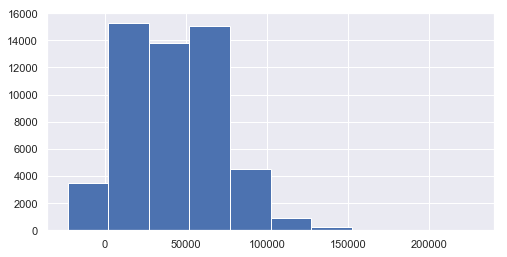

In [19]:
dfa["Total_Pay"].hist(figsize=(8,4), bins=10)

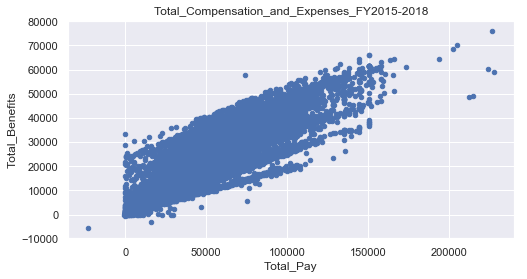

In [21]:
dfa[dfa['Job_Type'].isin(["Classified", "Exempt"])].plot.scatter('Total_Pay', \
    'Total_Benefits', figsize=(8,4), title="Total_Compensation_and_Expenses_FY2015-2018")

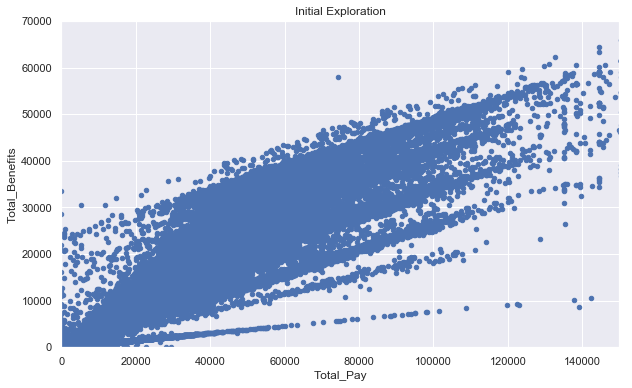

In [22]:
# Plot without outliers
dfa\
   .plot.scatter('Total_Pay', 'Total_Benefits',  \
    figsize=(10,6), xlim=(0,150000), ylim =(0,70000),title="Initial Exploration")


In [23]:
# Filter or remove outliers
#dfa.loc[dfa['Total_Pay'] == some_value]
dsmall = dfa.loc[dfa['Total_Pay'] < 150000]
dsmall.head(1)

,Name,Department,Agency,Job_Title,Job_Type,Pay,Other_Pay,Overtime_Units,Overtime_Pay,Total_Pay,Total_Benefits,Total_Compensation,Total_Expenses,Multiple_Record,Fiscal_Year
0,"Back,Philip",Administration Agency,Agency of Administration,Staff Attorney III,Exempt,74702.42,0.0,0.0,0.0,74702.42,31538.44,106240.86,63.86,NaN,2018


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1db9acd208>,
      dtype=object)

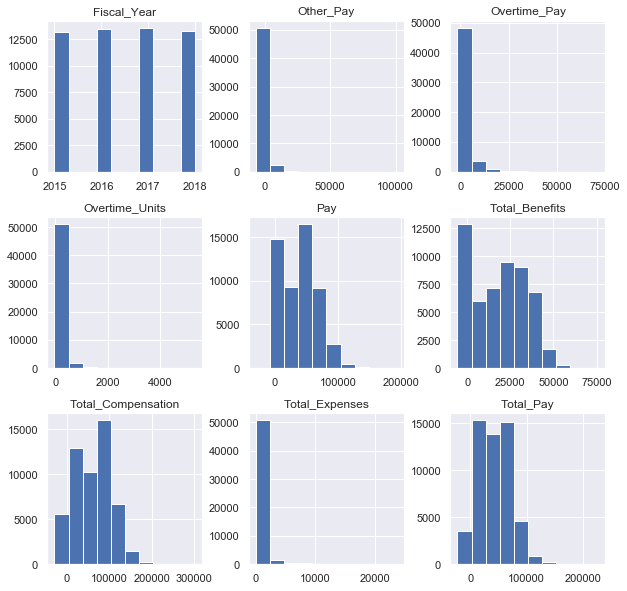

In [24]:
dfa.hist(figsize=(10,10), bins=10)

In [25]:
distribucion = pd.DataFrame(dfa.groupby("Department")["Total_Pay"].mean())
distribucion.head()

,Total_Pay
Department,
Administration Agency,50344.311932
"Agriculture, Food & Mrkts Agency",47393.469647
Attorney General's Office,56226.755625
Auditor of Accounts' Office,81689.187213
Buildings & General Services,34814.730147


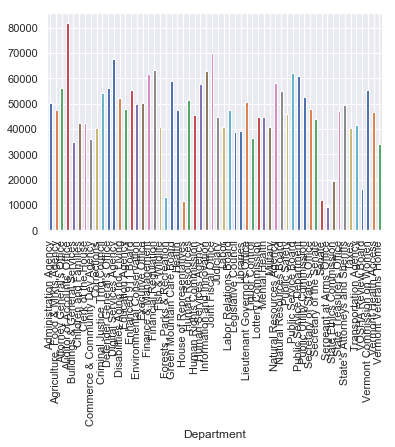

In [26]:
# naive simple bar plot, but only work for a few variables, otherwise bin
distribucion["Total_Pay"].plot(kind="bar")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f95fee8fc88>]],
      dtype=object)

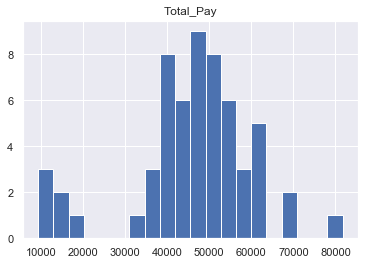

In [117]:
distribucion[distribucion["Total_Pay"] < 150000].hist(bins=20)

In [118]:
dfa["total_influx"] = dfa["Total_Pay"] + dfa["Total_Expenses"]

In [119]:
# binning in quartiles

In [120]:
dfa['Q-Total_Pay'] = pd.qcut(dfa.Total_Pay, 4, labels=['Q4','Q3','Q2','Q1'])
dfa['Q-Total_Benefits'] = pd.qcut(dfa.Total_Benefits, 4, labels=['Q4','Q3','Q2','Q1'])

In [121]:
dfa.head(12)

,Name,Department,Agency,Job_Title,Job_Type,Pay,Other_Pay,Overtime_Units,Overtime_Pay,Total_Pay,Total_Benefits,Total_Compensation,Total_Expenses,Multiple_Record,Fiscal_Year,total_influx,Q-Total_Pay,Q-Total_Benefits
0,"Back,Philip",Administration Agency,Agency of Administration,Staff Attorney III,Exempt,74702.42,0.00,0.00,0.00,74702.42,31538.44,106240.86,63.86,NaN,2018,74766.28,Q1,Q1
1,"Benham,Shawn D",Administration Agency,Agency of Administration,Agency Financial Analyst,Classified,72884.99,140.00,0.00,0.00,73024.99,42418.36,115443.35,159.92,NaN,2018,73184.91,Q1,Q1
2,"Browning,Nathalie F",Administration Agency,Agency of Administration,Financial Specialist III,Classified,51460.85,50.00,39.75,1498.15,53009.00,21985.35,74994.35,29.69,NaN,2018,53038.69,Q2,Q2
3,"Burns,John S",Administration Agency,Agency of Administration,Financial Specialist II,Classified,16790.41,6411.40,0.00,0.00,23201.81,7376.37,30578.18,0.00,NaN,2018,23201.81,Q3,Q3
4,"Churchill,Connie L",Administration Agency,Agency of Administration,Financial Specialist III,Classified,55778.43,382.07,0.00,0.00,56160.50,31261.68,87422.18,0.00,NaN,2018,56160.50,Q2,Q1
5,"Duchac,William H",Administration Agency,Agency of Administration,Risk Mgt Policy&Mediation Dir,Classified,55120.06,6159.40,0.00,0.00,61279.46,27266.04,88545.50,134.82,NaN,2018,61414.28,Q2,Q2
6,"Ferland,Bradley L",Administration Agency,Agency of Administration,Deputy Secretary,Exempt,123704.00,0.00,0.00,0.00,123704.00,59810.15,183514.15,0.00,NaN,2018,123704.00,Q1,Q1
7,"Fuller,Breanna Leigh",Administration Agency,Agency of Administration,Administrative Srvcs Cord III,Classified,53228.02,1258.68,27.00,900.00,55386.70,37530.37,92917.07,0.00,NaN,2018,55386.70,Q2,Q1
8,"Fuller,Stephanie L",Administration Agency,Agency of Administration,Financial Manager III,Classified,71782.13,0.00,1.50,49.88,71832.01,35328.20,107160.21,0.00,NaN,2018,71832.01,Q1,Q1
9,"Kukenberger,Bradley Edward",Administration Agency,Agency of Administration,Financial Director II,Classified,82848.29,0.00,4.00,159.48,83007.77,31478.49,114486.26,0.00,NaN,2018,83007.77,Q1,Q1


In [122]:
dfa2= dfa.groupby(['Q-Total_Pay','Q-Total_Benefits'], as_index=False).agg({'Total_Pay':['mean','std','count'],\
                                    'Total_Benefits':['mean','std','count'], 'total_influx':['mean']})


In [123]:
dfa2.head()

Q-Total_Pay Q-Total_Benefits Total_Benefits                      \
                                         mean          std  count   
0          Q4               Q4     615.451847   653.225332  11631   
1          Q4               Q3    5313.384225  2475.532035   1664   
2          Q4               Q2   23623.312683  2813.301088     41   
3          Q4               Q1   33502.030000          NaN      1   
4          Q3               Q4    1555.234015   498.247395   1706   

   total_influx     Total_Pay                      
           mean          mean          std  count  
0   5816.279862   4944.543303  3832.487119  11631  
1   9692.358215   9604.568486  2702.541478   1664  
2   5599.313902   5595.655366  4303.957204     41  
3    700.000000      0.000000          NaN      1  
4  20552.329361  20285.923898  6000.927486   1706

In [124]:
dfa2.columns=['Q-Total_Pay', 'Q-Total_Benefits', 'TIM','TB_mean', 'TB_std', 'TB_count','TP_mean','TP_std','TP_count'
             ]

In [125]:
dfa2.head()

,Q-Total_Pay,Q-Total_Benefits,TIM,TB_mean,TB_std,TB_count,TP_mean,TP_std,TP_count
0,Q4,Q4,615.451847,653.225332,11631,5816.279862,4944.543303,3832.487119,11631
1,Q4,Q3,5313.384225,2475.532035,1664,9692.358215,9604.568486,2702.541478,1664
2,Q4,Q2,23623.312683,2813.301088,41,5599.313902,5595.655366,4303.957204,41
3,Q4,Q1,33502.030000,NaN,1,700.000000,0.000000,NaN,1
4,Q3,Q4,1555.234015,498.247395,1706,20552.329361,20285.923898,6000.927486,1706


In [126]:
# Create a new column where you set class
dfa2["class"] = dfa2["Q-Total_Pay"].astype(str) + dfa2["Q-Total_Benefits"].astype(str)
dfa2.head()

,Q-Total_Pay,Q-Total_Benefits,TIM,TB_mean,TB_std,TB_count,TP_mean,TP_std,TP_count,class
0,Q4,Q4,615.451847,653.225332,11631,5816.279862,4944.543303,3832.487119,11631,Q4Q4
1,Q4,Q3,5313.384225,2475.532035,1664,9692.358215,9604.568486,2702.541478,1664,Q4Q3
2,Q4,Q2,23623.312683,2813.301088,41,5599.313902,5595.655366,4303.957204,41,Q4Q2
3,Q4,Q1,33502.030000,NaN,1,700.000000,0.000000,NaN,1,Q4Q1
4,Q3,Q4,1555.234015,498.247395,1706,20552.329361,20285.923898,6000.927486,1706,Q3Q4


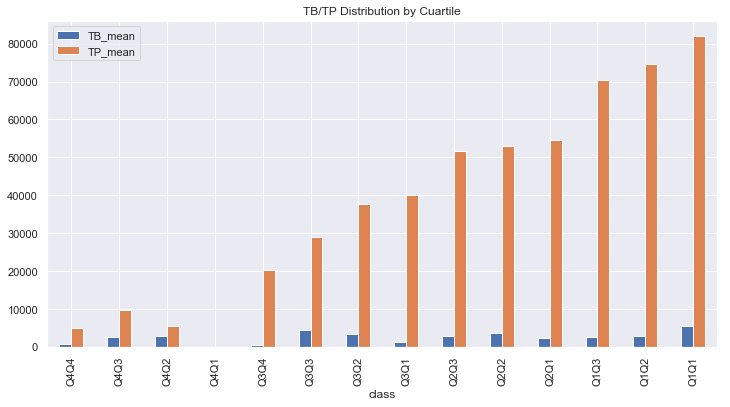

In [127]:

dfa2.set_index("class")[["TB_mean", "TP_mean"]].plot(kind='bar',\
                            figsize=(12,6), title="TB/TP Distribution by Cuartile")

## Stacking and unstacking. Stacking is to take a level of the columns index and transfer it to the rows index. 
## Therefore, unstacking is the opposite; transferring a level from the rows level to the columns level.

In [128]:
# You may want to see how a variable is distributed in the quartiles , use unstack
dfa2.groupby(["Q-Total_Pay", "Q-Total_Benefits"])["TIM"].mean().unstack()

Q-Total_Benefits,Q4,Q3,Q2,Q1
Q-Total_Pay,,,,
Q4,615.451847,5313.384225,23623.312683,33502.030000
Q3,1555.234015,11761.383202,24926.955991,33127.027118
Q2,NaN,15026.261731,24716.287873,35018.002843
Q1,NaN,16852.202103,26065.845263,39822.579867


In [129]:
# Create meta-quartiles - Reduce classes

In [130]:
dfa2["Q-Total_Pay"] = dfa2["Q-Total_Pay"].replace(["Q1", "Q2", "Q3", "Q4"], ["Q1-Q2", "Q1-Q2", "Q3-Q4", "Q3-Q4"])
dfa2["Q-Total_Benefits"] = dfa2["Q-Total_Benefits"].replace(["Q1", "Q2", "Q3", "Q4"], ["Q1-Q2", "Q1-Q2", "Q3-Q4", "Q3-Q4"])

In [131]:
dfa2

,Q-Total_Pay,Q-Total_Benefits,TIM,TB_mean,TB_std,TB_count,TP_mean,TP_std,TP_count,class
0,Q3-Q4,Q3-Q4,615.451847,653.225332,11631,5816.279862,4944.543303,3832.487119,11631,Q4Q4
1,Q3-Q4,Q3-Q4,5313.384225,2475.532035,1664,9692.358215,9604.568486,2702.541478,1664,Q4Q3
2,Q3-Q4,Q1-Q2,23623.312683,2813.301088,41,5599.313902,5595.655366,4303.957204,41,Q4Q2
3,Q3-Q4,Q1-Q2,33502.030000,NaN,1,700.000000,0.000000,NaN,1,Q4Q1
4,Q3-Q4,Q3-Q4,1555.234015,498.247395,1706,20552.329361,20285.923898,6000.927486,1706,Q3Q4
5,Q3-Q4,Q3-Q4,11761.383202,4435.991392,8647,29274.574445,29063.860922,9235.919800,8647,Q3Q3
6,Q3-Q4,Q1-Q2,24926.955991,3270.180661,2577,37896.183648,37662.857936,5713.480464,2577,Q3Q2
7,Q3-Q4,Q1-Q2,33127.027118,1370.805028,406,40177.564187,40018.237882,3816.270968,406,Q3Q1
8,Q1-Q2,Q3-Q4,15026.261731,2822.927569,2288,52026.426254,51597.370865,4861.308159,2288,Q2Q3
9,Q1-Q2,Q1-Q2,24716.287873,3705.984959,7119,53280.302807,52869.916512,4580.409136,7119,Q2Q2


In [132]:
metafinal=dfa2.groupby(['Q-Total_Pay','Q-Total_Benefits'], as_index=False)\
.agg({'TB_mean':['mean'],'TP_mean':['mean'],'TIM':['sum'],\
  'TP_count':['mean']})

In [133]:
metafinal.columns = ['Q-TP','Q-TB','TB_mean','TP_mean','TIMsum',\
                    'TPCM']

In [134]:
metafinal["ratio"]=metafinal['TB_mean']/metafinal['TP_mean']

In [135]:
metafinal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 0 to 3
Data columns (total 7 columns):
Q-TP       4 non-null object
Q-TB       4 non-null object
TB_mean    4 non-null float64
TP_mean    4 non-null float64
TIMsum     4 non-null float64
TPCM       4 non-null float64
ratio      4 non-null float64
dtypes: float64(5), object(2)
memory usage: 256.0+ bytes


In [136]:
metafinal.head()

,Q-TP,Q-TB,TB_mean,TP_mean,TIMsum,TPCM,ratio
0,Q1-Q2,Q1-Q2,125622.715846,3611.497033,66044.696815,5912.00,34.784112
1,Q1-Q2,Q3-Q4,31878.463834,2694.837277,61040.572638,1512.50,11.829458
2,Q3-Q4,Q1-Q2,115179.325793,2484.762259,20819.187796,756.25,46.354264
3,Q3-Q4,Q3-Q4,19245.453289,2015.749038,15974.724152,5912.00,9.547544


In [137]:
metafinal["metaclass"] =metafinal["Q-TP"].astype(str) + metafinal["Q-TB"].astype(str)

In [138]:
metafinal.head()

,Q-TP,Q-TB,TB_mean,TP_mean,TIMsum,TPCM,ratio,metaclass
0,Q1-Q2,Q1-Q2,125622.715846,3611.497033,66044.696815,5912.00,34.784112,Q1-Q2Q1-Q2
1,Q1-Q2,Q3-Q4,31878.463834,2694.837277,61040.572638,1512.50,11.829458,Q1-Q2Q3-Q4
2,Q3-Q4,Q1-Q2,115179.325793,2484.762259,20819.187796,756.25,46.354264,Q3-Q4Q1-Q2
3,Q3-Q4,Q3-Q4,19245.453289,2015.749038,15974.724152,5912.00,9.547544,Q3-Q4Q3-Q4


In [139]:
metafinal.groupby(["Q-TB", "Q-TP"])["ratio"].mean().unstack()

Q-TP,Q1-Q2,Q3-Q4
Q-TB,,
Q1-Q2,34.784112,46.354264
Q3-Q4,11.829458,9.547544


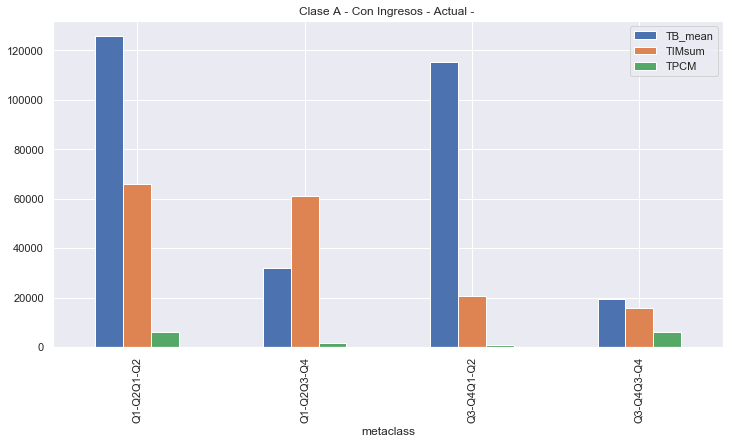

In [140]:
metafinal.set_index('metaclass')[['TB_mean','TIMsum','TPCM']].plot(kind='bar',\
                                                                                       figsize=(12,6), title="Clase A - Con Ingresos - Actual - ")

All pandas dataframe methods

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html

## References

This notebook is based in Dr. Benjamín Gutierrez García work